In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 20

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 42

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')

In [18]:
df['spam'] = df.yesno.map({'y': 1, 'n': 0})
df.drop(labels=['Unnamed: 0', 'yesno'], axis=1, inplace=True)

In [19]:
df.head()

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [20]:
X = df.drop(columns='spam')
y = df.spam

In [21]:
pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [22]:
poly_data = pf.fit_transform(X)
poly_cols = pf.get_feature_names(X.columns)# приводим названия колонок к требуемому в задании виду
poly_cols = [x.replace(' ', '_') for x in poly_cols]
poly_X = pd.DataFrame(poly_data, columns=poly_cols)
poly_X

,crl.tot,dollar,bang,money,n000,make,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278.0,0.000,0.778,0.00,0.00,0.00,0.000,216.284,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028.0,0.180,0.372,0.43,0.43,0.21,185.040,382.416,442.04,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259.0,0.184,0.276,0.06,1.16,0.06,415.656,623.484,135.54,2620.44,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191.0,0.000,0.137,0.00,0.00,0.00,0.000,26.167,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191.0,0.000,0.135,0.00,0.00,0.00,0.000,25.785,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88.0,0.000,0.000,0.00,0.00,0.31,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4597,14.0,0.000,0.353,0.00,0.00,0.00,0.000,4.942,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4598,118.0,0.000,0.000,0.00,0.00,0.30,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4599,78.0,0.000,0.000,0.00,0.00,0.96,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=SEED)

In [24]:
baseline_gbc = GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=100,
    max_depth=3, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    subsample=1,
    max_features=None,
    random_state=SEED,
)

In [25]:
baseline_gbc.fit(X_train, y_train)
baseline_y_pred = baseline_gbc.predict(X_test)
print(f"The accurace score for the baseline Gradient Boosting Classifier is {accuracy_score(y_test, baseline_y_pred):.3f}.")

The accurace score for the baseline Gradient Boosting Classifier is 0.865.


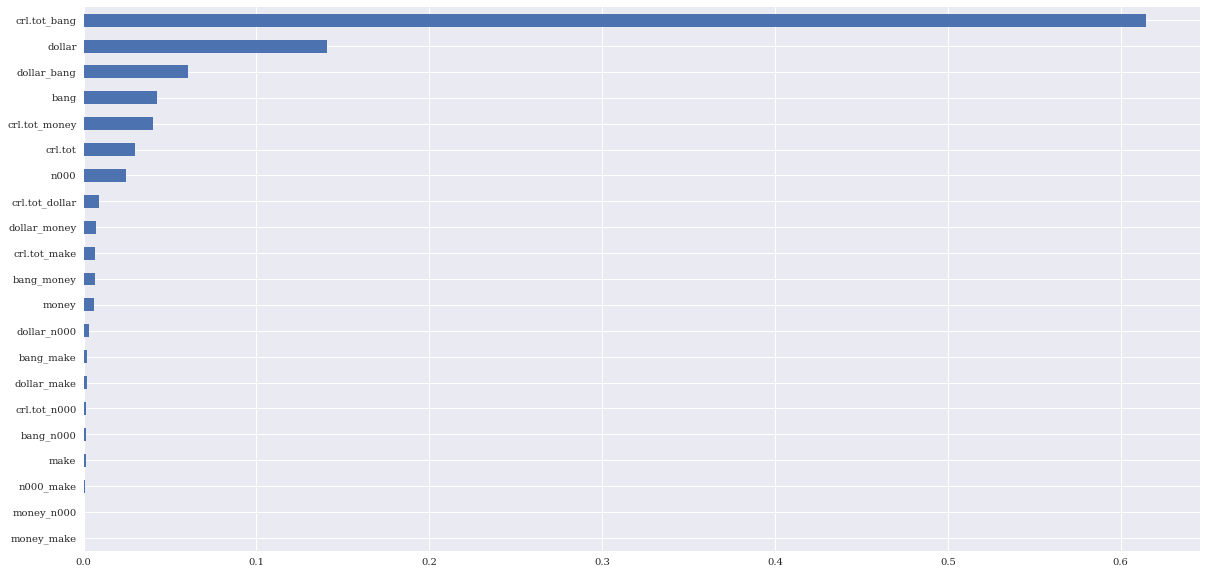

In [26]:
feature_importance = pd.Series(baseline_gbc.feature_importances_, index=poly_X.columns)
feature_importance_sorted = feature_importance.sort_values()
feature_importance_sorted.plot(kind='barh');

In [33]:
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
grid_search = GridSearchCV(estimator=baseline_gbc, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(random_state=42, subsample=1),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [36]:
print(f"Best accuracy score is {grid_search.best_score_:.3f}.")

Best accuracy score is 0.884.


In [47]:
grid_search.cv_results_['mean_fit_time'].shape[0]

48

In [49]:
list(range(5, 16))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [50]:
param_grid = {'max_depth': list(range(5, 16))}
grid_search_depth = GridSearchCV(estimator=baseline_gbc, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search_depth.fit(X_train, y_train)
grid_search_depth.best_params_

{'max_depth': 5}

In [68]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2, random_state=SEED)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        estimator_error = (sample_weight * incorrect).sum() / sample_weight.sum()
        
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * np.log ((1-estimator_error)/estimator_error) 

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        
    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print(f"Accuracy = {((preds == y).sum() / N):.3f}.")
    
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

Accuracy = 0.810.
